Applied Neutral Network model to classify Otto Group Product into correct categories

In [2]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.neural_network import MLPClassifier #Multi-Layer Perceptron Classifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

Read data from train.csv

In [3]:
data = pd.read_csv('~/Desktop/train.csv')

In [4]:
data

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [5]:
data.dtypes

id          int64
feat_1      int64
feat_2      int64
feat_3      int64
feat_4      int64
            ...  
feat_90     int64
feat_91     int64
feat_92     int64
feat_93     int64
target     object
Length: 95, dtype: object

#The data from the second column to the penultimate column are features

In [6]:
columns = data.columns[1:-1]

In [7]:
X = data[columns]

In [8]:
y = np.ravel(data['target'])

Observe the distribution of product categories

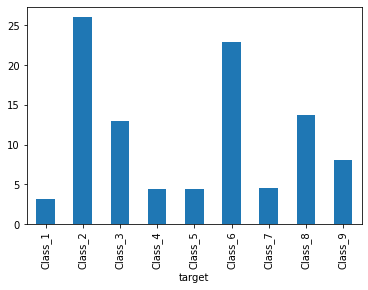

In [9]:
distribution = data.groupby('target').size() / data.shape[0] * 100.0
distribution.plot(kind='bar')
plt.show()

#Display the distribution of a feature in different categories

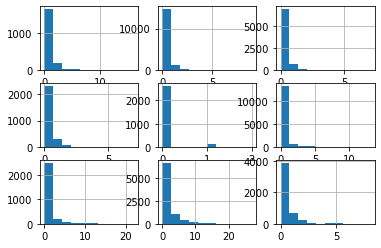

In [10]:
for id in range(9):
    plt.subplot(3, 3, id + 1)  
    # plt.axis('off')  #Do not show axis
    data[data.target == 'Class_' + str(id + 1)].feat_20.hist()
plt.show()   

#show ralationship between two features by scatter plot

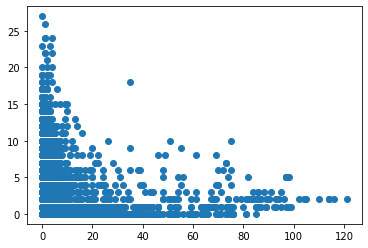

In [16]:
plt.scatter(data.feat_19, data.feat_20)
plt.show()

#show relationship between all pairs of features
#correlation

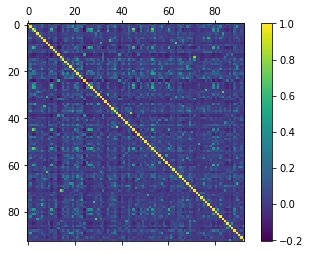

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111) # 1 row, 1 col, 1st plot
cax = ax.matshow(X.corr(), interpolation='nearest')
fig.colorbar(cax)
plt.show()

In [12]:
num_fea = X.shape[1]

#Initialize the neural network model, two hidden layers, the entire network is 93x30x10x9

In [13]:
#alpha is L-2 regularization coefficient
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (30, 10), random_state = 1, verbose = True)

#Training the model, it takes about 1 minute

In [14]:
model.fit(X, y)

/Users/Carol/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(30, 10), random_state=1,
              solver='lbfgs', verbose=True)

#Observe model coefficients and bias

In [15]:
model.intercepts_

[array([ 1.01091723,  0.36643089,  0.56335133, -0.06073759,  0.97092001,
         0.09580262,  0.87533445,  0.03533566,  1.1151112 ,  0.33840719,
         0.60871479,  0.49095722,  0.53324619,  0.12929714,  0.15787934,
         0.45422085,  0.55608288,  0.49374246,  0.51839834,  0.19471313,
         0.88520357,  1.90573526,  0.97588859,  0.03365997,  0.01038732,
         1.23616729,  0.00803677,  0.54165589,  0.48280137,  0.54275316]),
 array([ 1.54669133,  0.98531188,  0.85413894, -0.14144462,  0.17958329,
         0.4633206 ,  1.18073928,  0.50257731,  0.52916797,  1.01449688]),
 array([-0.14273552,  0.998085  ,  0.36354106, -1.38369119,  0.02934351,
        -0.17437324,  1.52630183,  0.83507164, -1.55304054])]

In [16]:
print(model.coefs_[0].shape)
print(model.coefs_[1].shape)
print(model.coefs_[2].shape)

(93, 30)
(30, 10)
(10, 9)


In [17]:
pred = model.predict(X)
pred

array(['Class_6', 'Class_8', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype='<U7')

#Output the accuracy of training data

In [18]:
model.score(X, y)

0.8030156113642974

In [19]:
sum(pred == y) / len(y)

0.8030156113642974

#Make predictions on test data

In [20]:
test_data = pd.read_csv('~/Desktop/test.csv')
Xtest = test_data[test_data.columns[1:]]
Xtest

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144363,0,0,0,0,0,0,0,0,0,1,...,0,0,2,1,1,0,0,0,0,0
144364,0,0,0,0,0,0,0,0,0,0,...,0,1,4,1,11,0,0,0,0,0
144365,0,1,0,0,0,0,1,1,0,0,...,0,1,3,1,1,0,0,1,0,0
144366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,0,1,0


In [21]:
test_prob = model.predict_proba(Xtest)

#The output is the predicted probability of each product belonging to each category, and add the id column, then output the result to ./otto_prediction.tsv

In [22]:
solution = pd.DataFrame(test_prob, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])

In [23]:
solution['id'] = test_data['id']
cols = solution.columns.tolist()
cols = cols[-1:] + cols[:-1]
solution = solution[cols]

In [24]:
solution.to_csv('~/Desktop/otto_prediction.tsv', index = False)